In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
from sklearn.model_selection import train_test_split 
%matplotlib inline
from sklearn.datasets import fetch_openml

In [19]:
# Fetching data
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

C:\Users\Schmoopie\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [20]:
# Separating data to X and y
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

## EDA

In [7]:
# Inspect index 33 of y
y[4]

9

In [8]:
pd.DataFrame(y).head()

,0
0,5
1,0
2,4
3,1
4,9


9


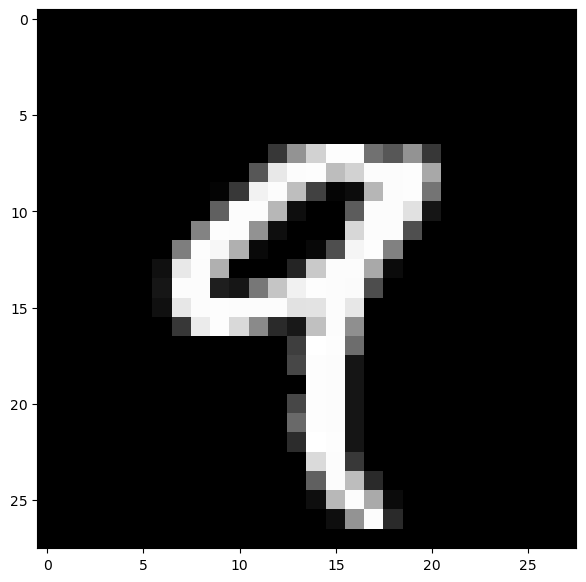

In [9]:
# Inspect what index 33 of y will look like in a plot

plt.figure(figsize=(7,7))
digit=4
digit_image = X[digit].reshape(28, 28)
plt.imshow(digit_image, cmap=plt.cm.gray)
print(y[digit])

## Prepare data to train/test

In [21]:
# Portion a part of the whole set due to the whole dataset freezing this PC.

X_train = X[:10000]
y_train = y[:10000]
X_val = X[10000:12000]
y_val = y[10000:12000]
X_test = X[12000:14000]
y_test = y[12000:14000]

In [22]:
# Standardising data för SVM model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Training of models

In [22]:
# training of a SVC linear model the train set 
model_01 = svm.SVC(kernel='linear', C=10, random_state = 0)
model_01.fit(X_train_scaled, y_train) 

# Predict on validation set
y_pred_01 = model_01.predict(X_val_scaled)
# print score
accuracy_score(y_pred_01, y_val)

0.912

In [23]:
# To see if the score can be improved, we´ll try a gridsearch to see if an hyperparameter altered model could perform better.

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly']}  
  
grid_01 = GridSearchCV(model_01, param_grid, cv= 2, refit = True, verbose = 3) 

# fitting the model for grid search 
grid_01.fit(X_train_scaled, y_train) 

# print best parameter after tuning 
print(grid_01.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_01.best_estimator_) 

Fitting 2 folds for each of 75 candidates, totalling 150 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.113 total time=  35.9s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.113 total time=  34.2s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   4.7s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   4.4s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.946 total time=  11.1s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=  11.6s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.113 total time=  32.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.113 total time=  31.7s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.916 total time=   4.7s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   4.4s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.946 total time=  10.6s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly

In [13]:
# Results
# {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
# SVC(C=0.1, gamma=1, kernel='poly', random_state=0)

# Testing the tuned model on the validation set
model_01v2 = svm.SVC(kernel='poly', gamma=1, C=0.1, random_state = 0)
model_01v2.fit(X_train_scaled, y_train) 

# Predict on validation set
y_pred_01v2 = model_01v2.predict(X_val_scaled)
# print score
accuracy_score(y_pred_01v2, y_val)

0.9605

### 0.9605 result from tuned poly SCV model. Ok result. Let´s try Random Forest Classifier 

In [23]:
# Testing Random Forest Classifier
model_02 = RandomForestClassifier() 
model_02.fit(X_train_scaled, y_train) 
  
# Predict on validation set
y_pred_02 = model_02.predict(X_val_scaled)
# print score
accuracy_score(y_pred_02, y_val)

0.9495

In [15]:
# 0.9459, Better result than un-tuned SVC model.

# Now let´s try tuning hyperparameters of RFC

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None],
} 

grid_02 = GridSearchCV(model_02, cv= 2, refit = True, verbose = 3,
                           param_grid=param_grid) 

# fitting the model for grid search 
grid_02.fit(X_train_scaled, y_train) 

# print best parameter after tuning 
print(grid_02.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_02.best_estimator_) 

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END max_features=sqrt, n_estimators=25;, score=0.918 total time=   0.7s
[CV 2/2] END max_features=sqrt, n_estimators=25;, score=0.917 total time=   0.7s
[CV 1/2] END max_features=sqrt, n_estimators=50;, score=0.932 total time=   1.4s
[CV 2/2] END max_features=sqrt, n_estimators=50;, score=0.929 total time=   1.4s
[CV 1/2] END max_features=sqrt, n_estimators=100;, score=0.940 total time=   2.9s
[CV 2/2] END max_features=sqrt, n_estimators=100;, score=0.933 total time=   2.8s
[CV 1/2] END max_features=sqrt, n_estimators=150;, score=0.943 total time=   4.5s
[CV 2/2] END max_features=sqrt, n_estimators=150;, score=0.935 total time=   4.4s
[CV 1/2] END max_features=log2, n_estimators=25;, score=0.916 total time=   0.3s
[CV 2/2] END max_features=log2, n_estimators=25;, score=0.904 total time=   0.3s
[CV 1/2] END max_features=log2, n_estimators=50;, score=0.923 total time=   0.7s
[CV 2/2] END max_features=log2, n_estimators

In [16]:
# Testing the tuned RFC model.

model_02v2 = RandomForestClassifier(max_features="sqrt", 
                                    n_estimators=150) 
model_02v2.fit(X_train_scaled, y_train) 

# Predict on validation set
y_pred_02v2 = model_02v2.predict(X_val_scaled)
# print score
accuracy_score(y_pred_02v2, y_val)

0.9505

In [ ]:
# A bit worse than the default hyper parameters.

## Evaluation on test data

In [20]:
# The tuned poly SCV model was best on accuracy score.
y_pred_test = model_01v2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)


0.96

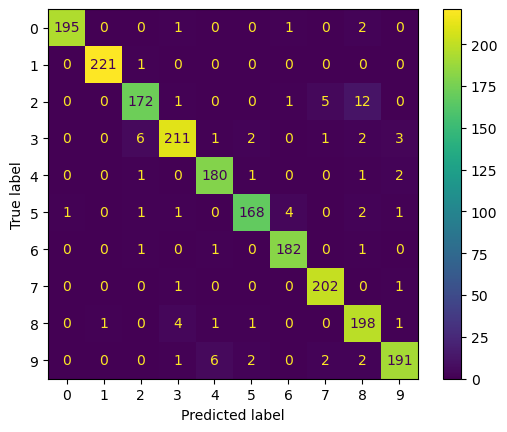

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

## Save model

In [24]:
import pickle
# Save with pickle
with open('picklemodelRFC.pkl', 'wb') as f:
    pickle.dump(model_02, f)

import joblib
# Save with joblib
joblib.dump(model_02, 'joblibmodelRFC.pkl')


#import with pickle
#with open('picklemodel.pkl', 'rb') as f:
#    loadedModel = pickle.load(f)

# import with joblib
#LoadedModel = joblib.load("joblibmodel.pkl")

['joblibmodelRFC.pkl']

In [12]:
import pickle
import joblib
LoadedModel = joblib.load("joblibmodel.pkl")
LoadedModel.predict(X_train_scaled)

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

In [17]:
with open('./picklemodelRFC.pkl', 'wb') as f:
    pickle.dump(model_02, f)
joblib.dump(model_02, './joblibmodelRFC.pkl')  
pickle.dump(model_02, open("save.pkl", "wb"))